In [93]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Set the random seed
random_seed = 42

In [62]:
df = pd.read_csv("/content/diabetes_prediction_dataset.csv")

In [63]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [65]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [66]:
df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [67]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [68]:
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (3854, 9)


In [69]:
df = df.drop_duplicates()

In [70]:
# Bar plot for gender
fig = px.bar(df, x=df['gender'].value_counts().index,
             y=df['gender'].value_counts().values,
             labels={'x':'Gender', 'y':'Count'},
             title='Gender distribution')
fig.show()


In [71]:
# Histogram for age
fig = px.histogram(df, x="age", nbins=50, title="Age distribution")
fig.show()


In [72]:
# Pie chart for smoking_history
fig = px.pie(df, names='smoking_history',
             title='Distribution of Smoking History',
             hole=.3) # creates a donut-like pie chart
fig.show()


In [73]:
def map_smoking_status(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past_smoker'
    else:
        return smoking_status

# Now apply this function to the smoking_history column
df['smoking_history'] = df['smoking_history'].apply(map_smoking_status)


In [74]:
le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df['smoking_history'] = le.fit_transform(df['smoking_history'])


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  int64  
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  int64  
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 7.3 MB


In [79]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,1.700840,-0.290050,4.848534,1,-0.314947,0.994563,0.043554,0
1,0,0.543372,-0.290050,-0.206248,1,-0.000216,0.994563,-1.423096,0
2,1,-0.614096,-0.290050,-0.206248,1,-0.000216,0.155970,0.483549,0
3,0,-0.257952,-0.290050,-0.206248,0,-0.572051,-0.496269,0.410216,0
4,1,1.522768,3.447677,4.848534,0,-1.061141,-0.682623,0.410216,0


In [78]:
scaler = StandardScaler()

# List of columns to scale
columns_to_scale = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease']

# Apply scaler on the data
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


#Logistic Regression

In [90]:
# Separate features and target variable
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train the logistic regression model
logreg_model = LogisticRegression(random_state=random_seed)
logreg_model.fit(X_train, y_train)

# Evaluate the model on the testing set
accuracy_lg = logreg_model.score(X_test, y_test)
print(accuracy_lg)


0.9566302652106085


#Random Forest

In [92]:
# Separate features and target variable
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train the random forest model
rf_model = RandomForestClassifier(random_state=random_seed)
rf_model.fit(X_train, y_train)

# Evaluate the model on the testing set
accuracy_rf = rf_model.score(X_test, y_test)
print(accuracy_rf)


0.9677067082683307


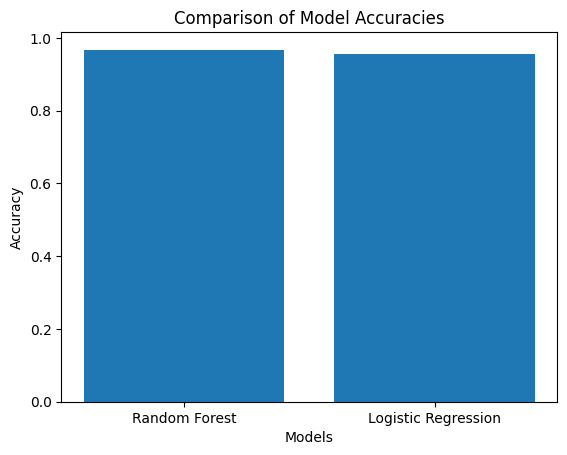

In [95]:
# Bar plot
models = ['Random Forest', 'Logistic Regression']
accuracies = [accuracy_rf, accuracy_lg]

plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()
